## Wine data set: Modeling, Evaluating and Validating the predictive model



### Data Set Information:

These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines. 

I think that the initial data set had around 30 variables, but for some reason I only have the 13 dimensional version. I had a list of what the 30 or so variables were, but a.) I lost it, and b.), I would not know which 13 variables are included in the set. 

The attributes are (dontated by Riccardo Leardi, riclea '@' anchem.unige.it ) 
<p>&nbsp; &nbsp; 1.  fixed acidity .</p>
<p>&nbsp; &nbsp; 2.  volatile acidity .</p>
<p>&nbsp; &nbsp; 3.  citric acid .</p>
<p>&nbsp; &nbsp; 4.  residual sugar .</p>
<p>&nbsp; &nbsp; 5.  chlorides .</p>
<p>&nbsp; &nbsp; 6.  free sulfur dioxide .</p>
<p>&nbsp; &nbsp; 7.  total sulfur dioxide.</p>
<p>&nbsp; &nbsp; 8.  density .</p>
<p>&nbsp; &nbsp; 9.  pH .</p>
<p>&nbsp; &nbsp; 10. sulphates .</p>
<p>&nbsp; &nbsp; 11. alcohol.</p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data
**Read in the Wine data file and set it to a data frame called wine_data.**

In [2]:
wine_data = pd.read_csv('/Users/extremium/downloads/winequality-red.csv')

In [3]:
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


**Data cleansing is not the focus of this exercise, but we will describe the data set to get a good look at the nature of our working data set**

In [4]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


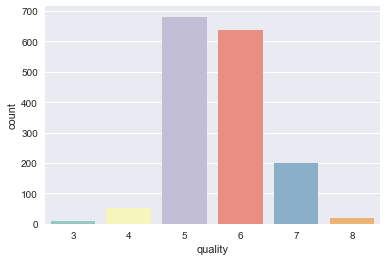

In [26]:
sns.countplot(x="quality", data=wine_data, palette="Set3")

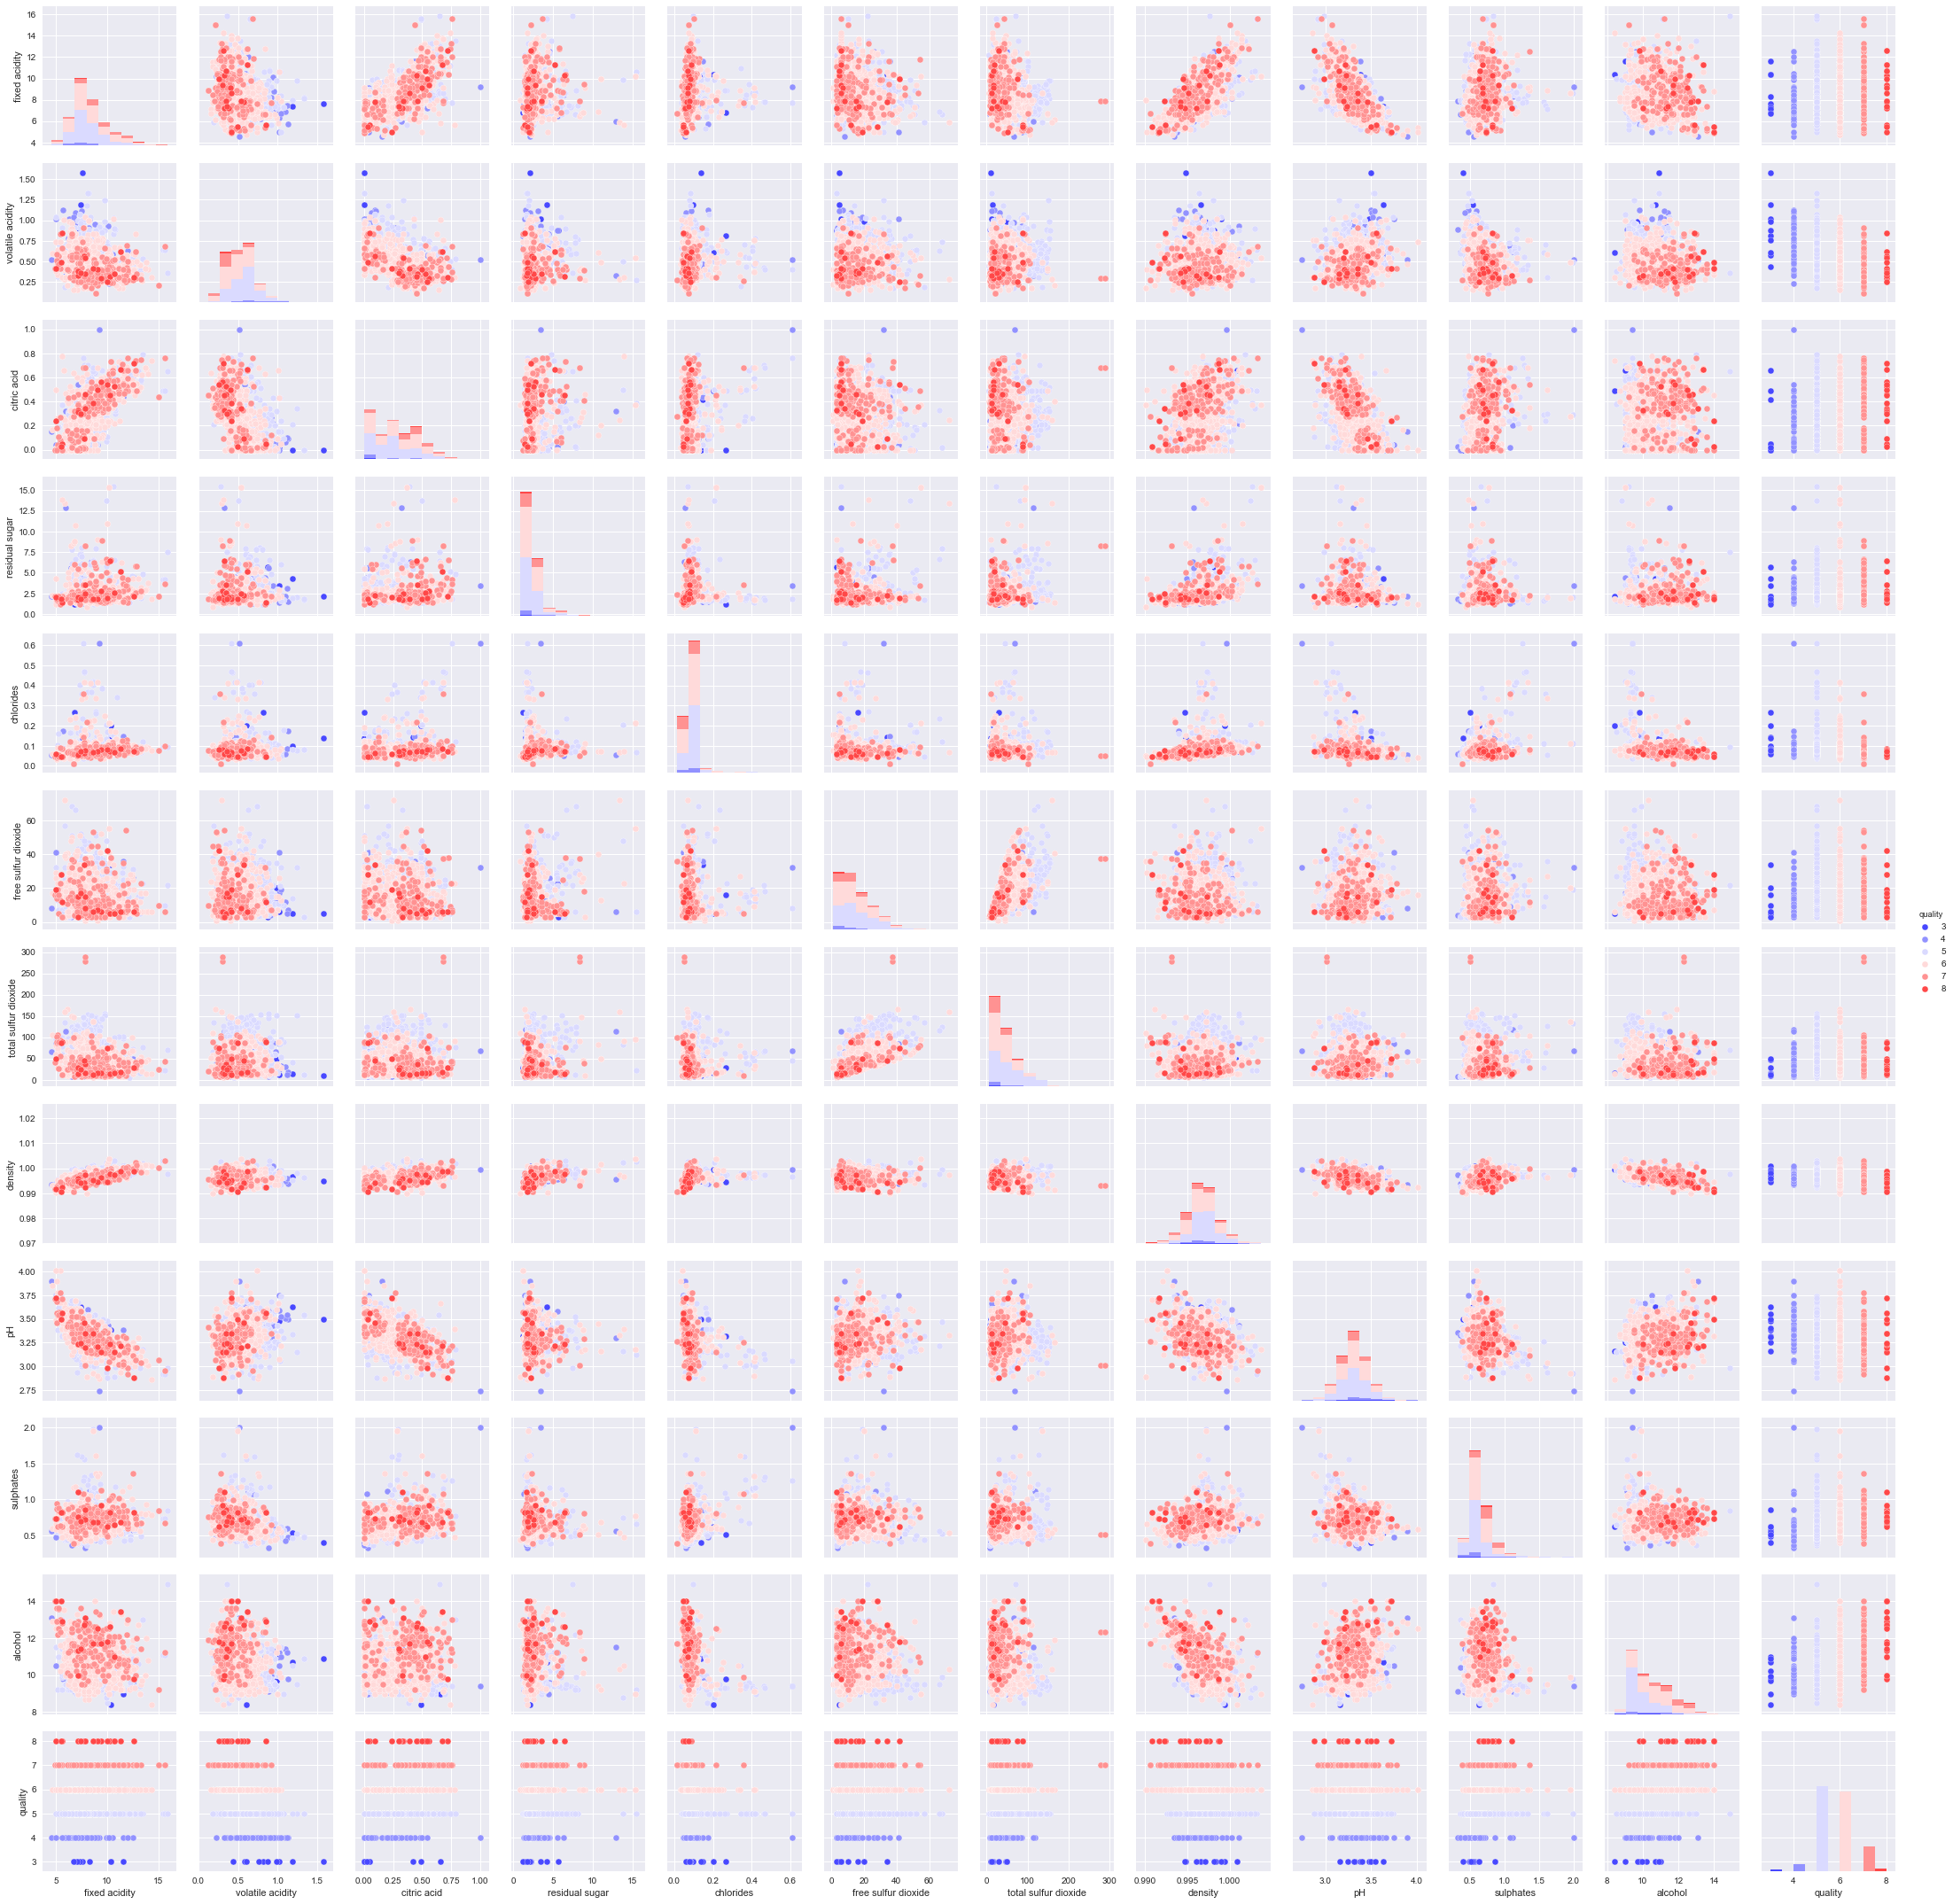

In [5]:
sns.pairplot(wine_data,hue='quality',palette='bwr')

We will compare **Logistic regression, Random forest and SVM models**
For all os the models, we will use the same test train data split.

## Logistic Regression

In [6]:
from sklearn.model_selection import train_test_split

In [18]:
y = wine_data['quality']
X = wine_data[['fixed acidity','volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide','density','pH','sulphates','alcohol']]

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [65]:
from sklearn.linear_model import LogisticRegression

In [66]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## Predictions and Evaluations
**Get predictions for logistic regression model**

In [67]:
predictions = logmodel.predict(X_test)

In [68]:
from sklearn.metrics import classification_report

In [69]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          3       0.00      0.00      0.00         1
          4       0.00      0.00      0.00        17
          5       0.61      0.75      0.67       195
          6       0.52      0.60      0.56       200
          7       0.43      0.05      0.09        61
          8       0.00      0.00      0.00         6

avg / total       0.52      0.56      0.51       480



/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [70]:
from sklearn.metrics import precision_recall_fscore_support as score
precision,recall,fscore,support=score(y_test,predictions,average='weighted')

In [71]:
reg_model = fscore

## Training  and Testing the Random Forest model

In [72]:
from sklearn.ensemble import RandomForestClassifier

In [73]:
rf = RandomForestClassifier(n_estimators=600)

In [74]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=600, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [75]:
predictions = rf.predict(X_test)

In [76]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          3       0.00      0.00      0.00         1
          4       0.00      0.00      0.00        17
          5       0.73      0.77      0.75       195
          6       0.63      0.70      0.66       200
          7       0.58      0.43      0.49        61
          8       0.50      0.17      0.25         6

avg / total       0.64      0.66      0.65       480



/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [77]:
precision,recall,fscore,support=score(y_test,predictions,average='weighted')
rf_model = fscore

In [78]:
rf_model

0.6463738394018593

## Training  and Testing SVM + Gridsearch 

In [79]:
from sklearn.svm import SVC

In [80]:
svc_model = SVC()

In [81]:
svc_model.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [82]:
predictions = svc_model.predict(X_test)

In [83]:
from sklearn.metrics import classification_report,confusion_matrix

In [84]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          3       0.00      0.00      0.00         1
          4       0.00      0.00      0.00        17
          5       0.60      0.72      0.65       195
          6       0.52      0.57      0.55       200
          7       0.54      0.21      0.31        61
          8       0.00      0.00      0.00         6

avg / total       0.53      0.56      0.53       480



/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [85]:
from sklearn.model_selection import GridSearchCV

In [86]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001]} 

In [87]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.1s
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] ................................... C=0.1, gamma=1, total=   0.1s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.1s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.1s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.1s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.1s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................................ C=0.1, gamma=0.01, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................................ C=0.1, gamma=0.01, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] .

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    3.8s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=2)

In [88]:
grid_predictions = grid.predict(X_test)

In [89]:
print(classification_report(y_test,grid_predictions))

             precision    recall  f1-score   support

          3       0.00      0.00      0.00         1
          4       0.00      0.00      0.00        17
          5       0.62      0.78      0.69       195
          6       0.51      0.56      0.54       200
          7       0.33      0.08      0.13        61
          8       0.00      0.00      0.00         6

avg / total       0.51      0.56      0.52       480



/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [90]:
precision,recall,fscore,support=score(y_test,grid_predictions,average='weighted')
svm_model = fscore

In [91]:
svm_model

0.5200523291453742

The random forest model performed best. Model performance can definitely be improved by cleaning the data set a little better, but that's not the focus of this excercise.